In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')

label =  np.unique(raw_data['quality'])
label

array([3, 4, 5, 6, 7, 8], dtype=int64)

# Pre-processing

In [ ]:
sns.countplot(raw_data['quality'])

In [ ]:
for i in raw_data:
    sns.distplot(raw_data[i])
    plt.show()

### Most of the data belongs from 5th and 6th class

In [ ]:
def heatmap(x):
    plt.figure(figsize=(10,10))
    sns.heatmap(x.corr() , annot=True ,cmap='coolwarm' , square=True , fmt= ".2f")
    plt.show()

In [24]:
train_data = raw_data.iloc[ : int(raw_data.shape[0] * .75) , :]
test_data = raw_data.iloc[int(raw_data.shape[0] * .75) : , :]
train_data_labels = train_data['quality']
test_data_labels = test_data['quality']
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11 )
zz = (pca.fit_transform(train_data))
x = np.argmax(pca.components_ , axis = 1 )
print(train_data.columns)
print(x)
train_data.iloc[:,x].head()


In [ ]:
# 6 is the idices of train_data which tell us that it has highest variance and if PCA try to reduce the dimention than 
# it's first prefer choice is that idices feature of training data
pca = PCA(n_components = 5 )
pca.fit_transform(train_data)
np.argmax(pca.components_ , axis = 1 )

In [ ]:
sns.countplot(train_data_labels)

In [ ]:
sns.countplot(test_data_labels)

In [ ]:
print("%.40f"%np.linalg.det(train_data.cov()))
c = train_data.columns.tolist()
c.remove('chlorides')
c.remove('pH')
c.remove('citric acid')

In [ ]:
print("%.20f"%np.linalg.det(train_data[c].cov()))
train_data[c].cov()

In [28]:
# Standardize data
train_data_normalize = ((train_data.iloc[:,:-1] - np.mean(train_data.iloc[:,:-1])) / np.std(train_data.iloc[:,:-1]))
test_data_normalize = ((test_data.iloc[:,:-1] - np.mean(test_data.iloc[:,:-1])) / np.std(test_data.iloc[:,:-1]))

train_data_normalize.head()

#train_data_normalize2 = (train_data[c] - np.mean(train_data[c])) / np.std(train_data[c])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712
1,-0.463362,2.014523,-1.491607,0.028111,0.180864,0.956022,0.592778,-0.137748,-0.631550,0.081104,-0.534222
2,-0.463362,1.344629,-1.288220,-0.209247,0.056615,-0.023780,0.209693,-0.031210,-0.247170,-0.089499,-0.534222
3,1.445622,-1.334945,1.355818,-0.525724,-0.295423,0.172180,0.386501,0.501476,-0.887804,-0.487571,-0.534222
4,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712


In [29]:
train_data_normalize = np.array(train_data_normalize)
train_data_labels = np.array(train_data_labels)

test_data_normalize = np.array(test_data_normalize)
test_data_labels = np.array(test_data_labels)

#train_data_normalize2 = np.array(train_data_normalize2)

In [30]:
class NeuralNetwork():
    
    def __init__(self,lmda = 0):
        
        self.input_layer_n   = 11
        self.hidden_layer1_n = 12
        self.hidden_layer2_n = 12
        self.hidden_layer3_n = 12
        self.hidden_layer4_n = 12
        self.hidden_layer5_n = 12
        self.output_layer = 6
        self.lmda = lmda
        self.label_length = 6
        
        self.theta_layer1 = np.random.randn(self.input_layer_n   , self.hidden_layer1_n)
        self.theta_layer2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer3 = np.random.randn(self.hidden_layer2_n , self.hidden_layer3_n)
        self.theta_layer4 = np.random.randn(self.hidden_layer3_n , self.hidden_layer4_n)
        self.theta_layer5 = np.random.randn(self.hidden_layer4_n , self.hidden_layer5_n)
        self.theta_layer6 = np.random.randn(self.hidden_layer5_n , self.output_layer)
        
        self.bias1 = np.random.randn(self.hidden_layer1_n)
        self.bias2 = np.random.randn(self.hidden_layer2_n)
        self.bias3 = np.random.randn(self.hidden_layer3_n)
        self.bias4 = np.random.randn(self.hidden_layer4_n)
        self.bias5 = np.random.randn(self.hidden_layer5_n)
        self.bias6 = np.random.randn(self.output_layer)
       
        
    def one_hot_label(self , data , label_length):
        one_hot_labels = np.zeros((data.shape[0] , label_length))
        for i in range(data.shape[0]):  
            one_hot_labels[i, data[i]-3 ] = 1  # our labels is 3,4,5,6,7,8 is we subtract by 3 it is 0,1,2,3,4,5
        return one_hot_labels


    def softmax(self , activation , theta , bias):
        exp = np.exp( np.dot( activation , theta )  + bias )
        denominator = np.sum( exp , axis = 1)
        s = list(map(lambda i : exp[:,i] / denominator , np.arange(self.label_length)))
        return np.array(s).T
        
    def sigmoid(self, activation , theta , bias):
        return 1 / (1 + np.exp(np.dot(activation , theta)))

    def forwardPropagation(self,X):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.sigmoid(self.activation_layer_0 , self.theta_layer1 , self.bias1)
        self.activation_layer_2 = self.sigmoid(self.activation_layer_1 , self.theta_layer2 , self.bias2)
        self.activation_layer_3 = self.sigmoid(self.activation_layer_2 , self.theta_layer3 , self.bias3)
        self.activation_layer_4 = self.sigmoid(self.activation_layer_3 , self.theta_layer4 , self.bias4)
        self.activation_layer_5 = self.sigmoid(self.activation_layer_4 , self.theta_layer5 , self.bias5)
        self.activation_layer_6 = self.softmax(self.activation_layer_5 , self.theta_layer6 , self.bias6)
        
        return self.activation_layer_6
        
    def costFunction(self,X,y):
        ''' Provide labels as "Y" '''
        self.y = self.one_hot_label( y , self.label_length)
        self.y_cap = self.forwardPropagation(X)
        return -np.sum(self.y * np.log(self.y_cap))
     
    
    def costFunctionDerivative(self,X,y):
        self.y_cap = self.forwardPropagation(X)
        dA1_dtheta_layer_1 = self.activation_layer_1 * ( 1-self.activation_layer_1 )   
        dA2_dtheta_layer_2 = self.activation_layer_2 * ( 1-self.activation_layer_2 )
        dA3_dtheta_layer_3 = self.activation_layer_3 * ( 1-self.activation_layer_3 ) # derivative w.r.t all layers activation
        dA4_dtheta_layer_4 = self.activation_layer_4 * ( 1-self.activation_layer_4 )
        dA5_dtheta_layer_5 = self.activation_layer_5 * ( 1-self.activation_layer_5 )
        
        self.target_y = self.one_hot_label(y , self.label_length)
        
        dL_dA6 = (self.y_cap - self.target_y)
        dL_dA5 = np.dot( dL_dA6 , self.theta_layer6.T )
        dL_dA4 = np.dot( dL_dA5 * dA5_dtheta_layer_5 ,self.theta_layer5.T )
        dL_dA3 = np.dot( dL_dA4 * dA4_dtheta_layer_4 ,self.theta_layer4.T )
        dL_dA2 = np.dot( dL_dA3 * dA3_dtheta_layer_3 ,self.theta_layer3.T )
        dL_dA1 = np.dot( dL_dA2 * dA2_dtheta_layer_2 ,self.theta_layer2.T  )
        
        
        dL_dtheta_layer_6 =  1/X.shape[0] * (np.dot(self.activation_layer_5.T , dL_dA6)) 
        dL_dtheta_layer_5 =  1/X.shape[0] * (np.dot(self.activation_layer_4.T , dA5_dtheta_layer_5 * dL_dA5))
        dL_dtheta_layer_4 =  1/X.shape[0] * (np.dot(self.activation_layer_3.T , dA4_dtheta_layer_4 * dL_dA4))
        dL_dtheta_layer_3 =  1/X.shape[0] * (np.dot(self.activation_layer_2.T , dA3_dtheta_layer_3 * dL_dA3))
        dL_dtheta_layer_2 =  1/X.shape[0] * (np.dot(self.activation_layer_1.T , dA2_dtheta_layer_2 * dL_dA2))
        dL_dtheta_layer_1 =  1/X.shape[0] * (np.dot(self.activation_layer_0.T , dA1_dtheta_layer_1 * dL_dA1))       
        
        dL_dbias6 =  1/X.shape[0] * (np.dot(1 , dL_dA6)) 
        dL_dbias5 =  1/X.shape[0] * (np.dot(1 , dA5_dtheta_layer_5 * dL_dA5))
        dL_dbias4 =  1/X.shape[0] * (np.dot(1 , dA4_dtheta_layer_4 * dL_dA4))
        dL_dbias3 =  1/X.shape[0] * (np.dot(1 , dA3_dtheta_layer_3 * dL_dA3))
        dL_dbias2 =  1/X.shape[0] * (np.dot(1 , dA2_dtheta_layer_2 * dL_dA2))
        dL_dbias1 =  1/X.shape[0] * (np.dot(1 , dA1_dtheta_layer_1 * dL_dA1))
        
        
        return dL_dtheta_layer_1, dL_dtheta_layer_2, dL_dtheta_layer_3 , dL_dtheta_layer_4 , dL_dtheta_layer_5 , dL_dtheta_layer_6 , dL_dbias1 , dL_dbias2 , dL_dbias3 , dL_dbias4 , dL_dbias5 , dL_dbias6
      

In [10]:
def gradientDecent(NN , X , y , batch ):
    alpha = 0.01
    epsilon = 0.0001
    i = 1
    itera = []
    csfun = []
    while i < 2000:
        index = np.random.randint(0 , X.shape[0] , size=(batch,))
        
        initial_cost = NN.costFunction(X[index] , y[index] )
        
        theta1 , theta2 , theta3 , theta4, theta5 , theta6 , bias1 , bias2 , bias3 , bias4 , bias5 , bias6 = NN.costFunctionDerivative(X[index], y[index] )
        
        NN.theta_layer1 -=  alpha * theta1
        NN.theta_layer2 -=  alpha * theta2
        NN.theta_layer3 -=  alpha * theta3
        NN.theta_layer4 -=  alpha * theta4
        NN.theta_layer5 -=  alpha * theta5
        NN.theta_layer6 -=  alpha * theta6
        
        NN.bias1 -= alpha * bias1.sum(axis =0)
        NN.bias2 -= alpha * bias2.sum(axis =0)
        NN.bias3 -= alpha * bias3.sum(axis =0)
        NN.bias4 -= alpha * bias4.sum(axis =0)
        NN.bias5 -= alpha * bias5.sum(axis =0)
        NN.bias6 -= alpha * bias6.sum(axis =0)
        
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        #if abs(final_cost - initial_cost) < epsilon:
         #   break
        print('Iteration {} Initial cost {} final cost {}'.format(i , initial_cost , final_cost))    
        
        itera.append(i)
        csfun.append(final_cost)
        i+=1
    return itera , csfun

In [13]:
NN = NeuralNetwork()
itera , csfun = gradientDecent(NN , train_data_normalize , train_data_labels , 32)

Iteration 1 Initial cost 86.53531852513281 final cost 86.06541503838787
Iteration 2 Initial cost 91.37475630029496 final cost 90.90999778925374
Iteration 3 Initial cost 88.57748789806533 final cost 88.16876056928086
Iteration 4 Initial cost 87.27791436114114 final cost 86.85421792986239
Iteration 5 Initial cost 94.13711380586668 final cost 93.74645459769536
Iteration 6 Initial cost 103.87709008821474 final cost 103.39004383423374
Iteration 7 Initial cost 96.27275209262807 final cost 95.79562618450123
Iteration 8 Initial cost 78.79100263070424 final cost 78.41953326161197
Iteration 9 Initial cost 72.42411731988214 final cost 72.01796603462881
Iteration 10 Initial cost 83.3948555854787 final cost 82.87306492261348
Iteration 11 Initial cost 87.8804363388117 final cost 87.5219586610612
Iteration 12 Initial cost 80.83421918025309 final cost 80.34622431071774
Iteration 13 Initial cost 89.25364175392146 final cost 88.92733245165319
Iteration 14 Initial cost 83.5241459501188 final cost 83.1517

Iteration 201 Initial cost 59.786986043005044 final cost 59.70115206381688
Iteration 202 Initial cost 47.262171178031124 final cost 47.19480684561954
Iteration 203 Initial cost 35.81626365819584 final cost 35.77826641843767
Iteration 204 Initial cost 40.49790993817797 final cost 40.45754695012131
Iteration 205 Initial cost 58.89642118222854 final cost 58.831398464781685
Iteration 206 Initial cost 47.0450895814474 final cost 47.008430043793126
Iteration 207 Initial cost 40.43666598790778 final cost 40.39619705071772
Iteration 208 Initial cost 51.07322038862492 final cost 51.046396232074045
Iteration 209 Initial cost 56.677979347216194 final cost 56.567610601491936
Iteration 210 Initial cost 47.116484697776855 final cost 47.07306621700607
Iteration 211 Initial cost 51.176086815980184 final cost 51.15041499492677
Iteration 212 Initial cost 55.91607989693833 final cost 55.86665476921873
Iteration 213 Initial cost 48.430600329768694 final cost 48.41534077934205
Iteration 214 Initial cost 59

Iteration 335 Initial cost 43.986722048908845 final cost 43.903639884027946
Iteration 336 Initial cost 33.76167393602322 final cost 33.740159390579706
Iteration 337 Initial cost 44.82422576963525 final cost 44.7840941483918
Iteration 338 Initial cost 43.89571330679145 final cost 43.84603535430517
Iteration 339 Initial cost 47.997196865717974 final cost 47.966712408251645
Iteration 340 Initial cost 51.21091790278704 final cost 51.182396592747594
Iteration 341 Initial cost 38.355428336550546 final cost 38.3434700166461
Iteration 342 Initial cost 47.12809229050431 final cost 47.09598844324542
Iteration 343 Initial cost 47.90856667226358 final cost 47.88115507087566
Iteration 344 Initial cost 43.67146131292182 final cost 43.65368745101521
Iteration 345 Initial cost 41.68363533872768 final cost 41.6654613001251
Iteration 346 Initial cost 60.31570164922777 final cost 60.227148805348925
Iteration 347 Initial cost 35.44633171516027 final cost 35.42467758872883
Iteration 348 Initial cost 51.819

Iteration 450 Initial cost 45.815764346407704 final cost 45.77825302336194
Iteration 451 Initial cost 54.79994858870647 final cost 54.75562135220939
Iteration 452 Initial cost 39.64694185413159 final cost 39.62939325022402
Iteration 453 Initial cost 49.00096396409985 final cost 48.96262805422825
Iteration 454 Initial cost 50.9867738342223 final cost 50.95069318860523
Iteration 455 Initial cost 44.46120672687242 final cost 44.39437669038994
Iteration 456 Initial cost 35.22159643496794 final cost 35.2053721126591
Iteration 457 Initial cost 50.951232695250184 final cost 50.913337789135156
Iteration 458 Initial cost 46.20163181620918 final cost 46.15646813264644
Iteration 459 Initial cost 43.706711213664676 final cost 43.66449893746164
Iteration 460 Initial cost 40.802938946864074 final cost 40.78667926193044
Iteration 461 Initial cost 44.731163191727674 final cost 44.699074504418
Iteration 462 Initial cost 41.75218440700999 final cost 41.73834039646296
Iteration 463 Initial cost 46.601616

Iteration 568 Initial cost 38.14468296143668 final cost 38.124046343592084
Iteration 569 Initial cost 36.12119763248234 final cost 36.09257759579665
Iteration 570 Initial cost 43.74414998750578 final cost 43.704136460509
Iteration 571 Initial cost 37.99886540102163 final cost 37.9459957367404
Iteration 572 Initial cost 46.01091956902975 final cost 45.959913560651046
Iteration 573 Initial cost 31.428759164073593 final cost 31.416706067005617
Iteration 574 Initial cost 46.139028763293496 final cost 46.093129783967605
Iteration 575 Initial cost 44.474022005387276 final cost 44.416898530110906
Iteration 576 Initial cost 37.99853970548807 final cost 37.97920191695585
Iteration 577 Initial cost 42.079740951809356 final cost 42.05829735999628
Iteration 578 Initial cost 52.49038627526497 final cost 52.42893351802753
Iteration 579 Initial cost 49.771683682222964 final cost 49.734278862859036
Iteration 580 Initial cost 39.02914669323173 final cost 39.02204992429377
Iteration 581 Initial cost 49.

Iteration 740 Initial cost 39.420968844982546 final cost 39.37969713387492
Iteration 741 Initial cost 40.903586996990896 final cost 40.875456378329375
Iteration 742 Initial cost 36.80078756774888 final cost 36.788558460398654
Iteration 743 Initial cost 35.91558524479199 final cost 35.910474642053615
Iteration 744 Initial cost 32.740761927165465 final cost 32.71574299684252
Iteration 745 Initial cost 42.42111640724026 final cost 42.3295662159175
Iteration 746 Initial cost 37.90330863495871 final cost 37.89471085292577
Iteration 747 Initial cost 34.32503451345148 final cost 34.30315004263511
Iteration 748 Initial cost 41.386881737736914 final cost 41.36946487858537
Iteration 749 Initial cost 36.998682526995566 final cost 36.973662139871095
Iteration 750 Initial cost 40.92542894332673 final cost 40.895385487753785
Iteration 751 Initial cost 41.343054858466616 final cost 41.28846815016588
Iteration 752 Initial cost 39.23060791796279 final cost 39.219839077396
Iteration 753 Initial cost 32.

Iteration 916 Initial cost 41.16668179187789 final cost 41.15812666780896
Iteration 917 Initial cost 40.06110346647226 final cost 40.058358203558996
Iteration 918 Initial cost 41.31155890071513 final cost 41.29129130299934
Iteration 919 Initial cost 37.094727524992095 final cost 37.081707011592535
Iteration 920 Initial cost 40.72558396664742 final cost 40.70445689604537
Iteration 921 Initial cost 44.34382447587763 final cost 44.27591892622918
Iteration 922 Initial cost 42.20828245832875 final cost 42.17104592918763
Iteration 923 Initial cost 33.523768151581294 final cost 33.4917368035637
Iteration 924 Initial cost 36.01430748508429 final cost 35.997672448385764
Iteration 925 Initial cost 43.079539705983606 final cost 43.031483897889714
Iteration 926 Initial cost 43.84442248969907 final cost 43.830242143954926
Iteration 927 Initial cost 36.85016724264497 final cost 36.83102011216771
Iteration 928 Initial cost 40.09996618669797 final cost 40.08536352952906
Iteration 929 Initial cost 37.5

Iteration 1075 Initial cost 37.21416158653574 final cost 37.12740259896794
Iteration 1076 Initial cost 38.671087882095364 final cost 38.641046653620755
Iteration 1077 Initial cost 38.22963431280486 final cost 38.194817021025514
Iteration 1078 Initial cost 41.461599036345596 final cost 41.45417337652735
Iteration 1079 Initial cost 38.51523525050134 final cost 38.459392337944166
Iteration 1080 Initial cost 41.659504529566654 final cost 41.647651155213545
Iteration 1081 Initial cost 37.39309597128501 final cost 37.380908176901634
Iteration 1082 Initial cost 31.865294018382745 final cost 31.782863688917352
Iteration 1083 Initial cost 37.60973815011511 final cost 37.58856305287105
Iteration 1084 Initial cost 32.93524795026511 final cost 32.92621894456407
Iteration 1085 Initial cost 34.70533375732752 final cost 34.68976961166677
Iteration 1086 Initial cost 37.096245916337566 final cost 37.08311434646092
Iteration 1087 Initial cost 43.00962855878251 final cost 42.97314905757719
Iteration 1088

Iteration 1285 Initial cost 37.770007430953726 final cost 37.71831240959858
Iteration 1286 Initial cost 37.32326463770964 final cost 37.3130465397531
Iteration 1287 Initial cost 36.40782381223008 final cost 36.40528343315772
Iteration 1288 Initial cost 37.97979713315005 final cost 37.963902567624125
Iteration 1289 Initial cost 49.1187646500335 final cost 49.05902539649142
Iteration 1290 Initial cost 39.72549611285455 final cost 39.712797157374474
Iteration 1291 Initial cost 42.68290920753879 final cost 42.66824469111888
Iteration 1292 Initial cost 33.539079636573454 final cost 33.51231931118731
Iteration 1293 Initial cost 39.66275197177466 final cost 39.64791580578081
Iteration 1294 Initial cost 36.495315106751136 final cost 36.48063671931777
Iteration 1295 Initial cost 40.63575123239893 final cost 40.631610883047045
Iteration 1296 Initial cost 42.38383028771956 final cost 42.345764462663716
Iteration 1297 Initial cost 45.44087354815865 final cost 45.40799058230509
Iteration 1298 Initi

Iteration 1468 Initial cost 34.50189085983094 final cost 34.47404408379627
Iteration 1469 Initial cost 46.84114729254603 final cost 46.812914775135866
Iteration 1470 Initial cost 32.45667204598916 final cost 32.42096856677293
Iteration 1471 Initial cost 38.27609355434434 final cost 38.27007880246704
Iteration 1472 Initial cost 34.3646317238483 final cost 34.30549644450849
Iteration 1473 Initial cost 41.931983490196096 final cost 41.920359314230886
Iteration 1474 Initial cost 32.60891795867583 final cost 32.58545491709164
Iteration 1475 Initial cost 41.69070913282497 final cost 41.65009857377723
Iteration 1476 Initial cost 33.88024997378034 final cost 33.86818207439546
Iteration 1477 Initial cost 37.44989731925001 final cost 37.44701984301015
Iteration 1478 Initial cost 37.1132259885439 final cost 37.10313344293653
Iteration 1479 Initial cost 35.11913611050814 final cost 35.11394039403021
Iteration 1480 Initial cost 37.6399693768858 final cost 37.633259856907316
Iteration 1481 Initial c

Iteration 1631 Initial cost 34.97329122732502 final cost 34.886135584927814
Iteration 1632 Initial cost 44.028971203091345 final cost 43.99723484771751
Iteration 1633 Initial cost 42.39938932245472 final cost 42.38791968465921
Iteration 1634 Initial cost 44.855070055762596 final cost 44.83156922422409
Iteration 1635 Initial cost 37.75803458661775 final cost 37.75230535995946
Iteration 1636 Initial cost 33.43443128207781 final cost 33.425267022185025
Iteration 1637 Initial cost 39.59844221162376 final cost 39.5725601906847
Iteration 1638 Initial cost 40.29249238220236 final cost 40.27089141657294
Iteration 1639 Initial cost 32.730568217705525 final cost 32.68364819629023
Iteration 1640 Initial cost 40.821803827279616 final cost 40.79468203903424
Iteration 1641 Initial cost 34.65757331121204 final cost 34.64678210726808
Iteration 1642 Initial cost 38.07566917621186 final cost 38.07441647395125
Iteration 1643 Initial cost 37.911606564571805 final cost 37.88570295985684
Iteration 1644 Init

Iteration 1812 Initial cost 35.87818060297472 final cost 35.76858235317408
Iteration 1813 Initial cost 42.21021189923438 final cost 42.172226904709454
Iteration 1814 Initial cost 39.54058031915011 final cost 39.52936274729597
Iteration 1815 Initial cost 32.70064529407353 final cost 32.69222223234792
Iteration 1816 Initial cost 41.50804628829532 final cost 41.49653771071448
Iteration 1817 Initial cost 41.56796161935725 final cost 41.56264501730845
Iteration 1818 Initial cost 30.96495719513142 final cost 30.948163077205926
Iteration 1819 Initial cost 31.86635358558423 final cost 31.845454648510394
Iteration 1820 Initial cost 35.5494657462889 final cost 35.50955687067417
Iteration 1821 Initial cost 35.82369541234688 final cost 35.815395035880854
Iteration 1822 Initial cost 35.533319145516714 final cost 35.52916469323078
Iteration 1823 Initial cost 41.093890759096105 final cost 41.07992841926145
Iteration 1824 Initial cost 39.77608719284625 final cost 39.77159778881619
Iteration 1825 Initi

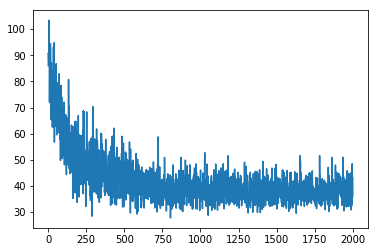

In [14]:
plt.plot(itera , csfun)

In [15]:
qq = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) +3)
co=0
for i in range(len(train_data_labels)):
    if qq[i] == train_data_labels[i]:
        co+=1
print('accuracy :')
print((co/len(train_data_labels))*100)

accuracy :
38.19849874895746


In [16]:
qq = (np.argmax(NN.forwardPropagation(test_data_normalize) , axis=1) +3)
co=0
for i in range(len(test_data_labels)):
    if qq[i] == test_data_labels[i]:
        co+=1
print('accuracy : ')
print((co/len(test_data_labels))*100)

accuracy : 
39.25


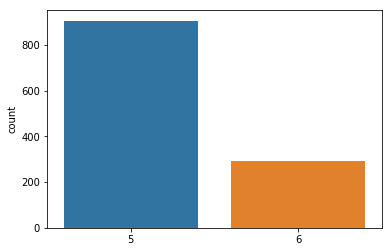

In [17]:
z  = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) + 3) 
sns.countplot(z)

In [18]:
qq = pd.DataFrame([(np.argmax(NN.forwardPropagation(train_data_normalize) , axis =1 )+3) , train_data_labels]  ).T
qq.columns = ['predicted','actual']
qq.head()

,predicted,actual
0,5,5
1,6,5
2,6,5
3,5,6
4,5,5


Accuracy    method    feature_select

40-50%    batch(32)       8

45-50%    batch(32)       11( all )

<IPython.core.display.Javascript object>


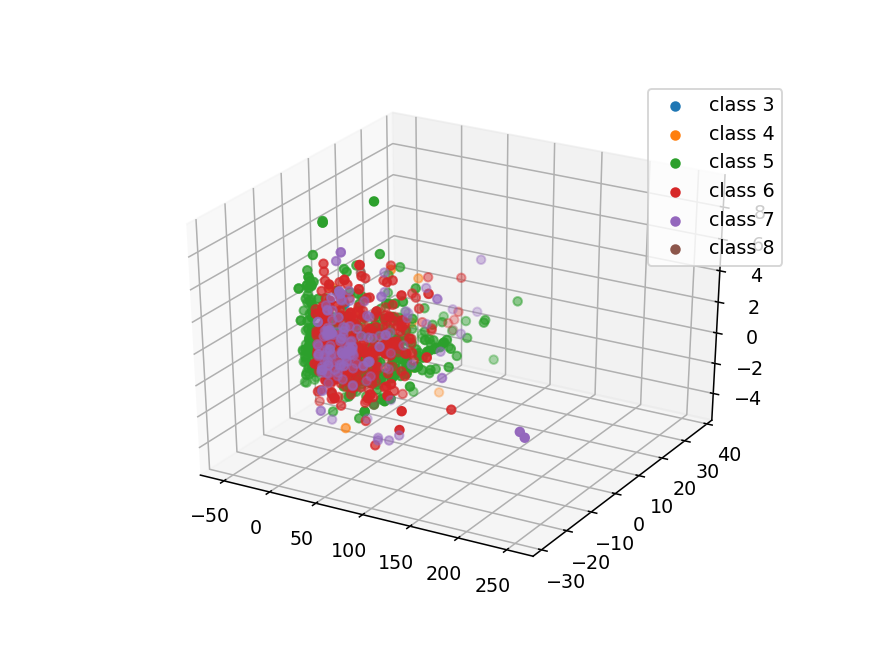

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
xx = []
yy = []
zz = []
for i in label:
    t = pca.fit_transform( train_data[train_data['quality'] == i].iloc[:,:-1] ) # 11 features goes and return 3 features
    xx.append(t.T[0])
    yy.append(t.T[1])
    zz.append(t.T[2])

xx = np.array(xx)  # 6,    
yy = np.array(yy)  # 6,
zz = np.array(zz)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')
for i in range(len(label)):
    a = 'class '+ str(i + 3)
    ax.scatter3D(xx[i],yy[i],zz[i] , label = a)
ax.legend()
plt.show()